# Environment Setup

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1950_bacteria_4881.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg
/kaggle/input/chest-xray-pneumo

# Some Basic Idea About Pneumonia

# What is Pneumonia

* Pneumonia is a lung infection that can range from mild to so severe that you have to go to the hospital.
* 
* It happens when an infection causes the air sacs in your lungs (your doctor will call them alveoli) to fill with fluid or pus. That can make it hard for you to breathe in enough oxygen to reach your bloodstream.
* 
*  Anyone can get this lung infection. But infants younger than age 2 and people over age 65 are at higher risk. That’s because their immune systems might not be strong enough to fight it.
* 
* You can get pneumonia in one or both lungs. You can also have it and not know it. Doctors call this walking pneumonia. Causes include bacteria, viruses, and fungi. If your pneumonia results from bacteria or a virus, you can spread it to someone else.

Your symptoms can vary depending on what’s causing your pneumonia, your age, and your overall health. They usually develop over several days.

* Common pneumonia symptoms include:

Chest pain when you breathe or cough
Cough that produces phlegm or mucus
Fatigue and loss of appetite
Fever, sweating, and chills
Nausea, vomiting, and diarrhea
Shortness of breath
Causes of Pneumonia
Bacteria, viruses, or fungi can cause pneumonia.

* Common causes include:

Flu viruses
Cold viruses
RSV virus (the top cause of pneumonia in babies age 1 or younger) 4, Bacteria called Streptococcus pneumoniae and Mycoplasma pneumoniae
Pneumonia Diagnosis
Your doctor will start with questions about your symptoms and your medical history, like whether you smoke and whether you’ve been around sick people at home, school, or work. Then, they’ll listen to your lungs. If you have pneumonia, they might hear cracking, bubbling, or rumbling sounds when you breathe in.

* If your doctor thinks you might have pneumonia, they’ll probably give you tests, including:

Blood tests to look for signs of a bacterial infection
A chest X-ray to find the infection in your lungs and how far it’s spread
Pulse oximetry to measure the level of oxygen in your blood
A sputum test to check the fluid in your lungs for the cause of an infection
If your symptoms started in the hospital or you have other health problems, your doctor might give you more tests, such as:

An arterial blood gas test to measure the oxygen in a small amount of blood taken from one of your arteries
Bronchoscopy to check your airways for blockages or other problems
A CT scan to get a more detailed image of your lungs
A pleural fluid culture, in which the doctor removes a small amount of fluid from the tissues around your lungs to look for bacteria that might cause pneumonia
Let's watch a video

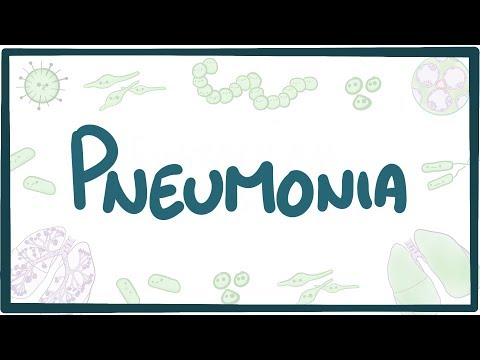

In [2]:
from IPython.display import YouTubeVideo,HTML
YouTubeVideo("IAQp2Zuqevc", width=800, height=500)

# Import librarires

In [3]:
!pip install -q efficientnet

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [4]:
import os
from glob import glob

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# nn
from keras.layers.core import Dense, Dropout
from keras.layers import GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import efficientnet.tfkeras as efn
from keras.callbacks import ReduceLROnPlateau, Callback, ModelCheckpoint

#bokeh
from bokeh.models import ColumnDataSource, HoverTool, Panel, FactorRange
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, output_file
from bokeh.palettes import Spectral6

import warnings
warnings.filterwarnings('ignore')

# Load the data and initialize file structure

In [5]:
# setup file structure
base_dir = "../input/chest-xray-pneumonia/chest_xray/"
train_dir = os.path.join(base_dir, "train/")
test_dir = os.path.join(base_dir, "test/")
val_dir = os.path.join(base_dir, "val/")

In [6]:
print("Number of images in Trian is {}".format(len(glob(train_dir + "*/*"))))
print("Number of images in Test is {}".format(len(glob(test_dir + "*/*"))))
print("Number of images in Validation is {}".format(len(glob(val_dir + "*/*"))))

Number of images in Trian is 5216
Number of images in Test is 624
Number of images in Validation is 16


# Visualize the Dataset

In [7]:
Normal = glob(train_dir + "NORMAL/*")
Pneumonia = glob(test_dir + "PNEUMONIA/*")

Display Normal Images


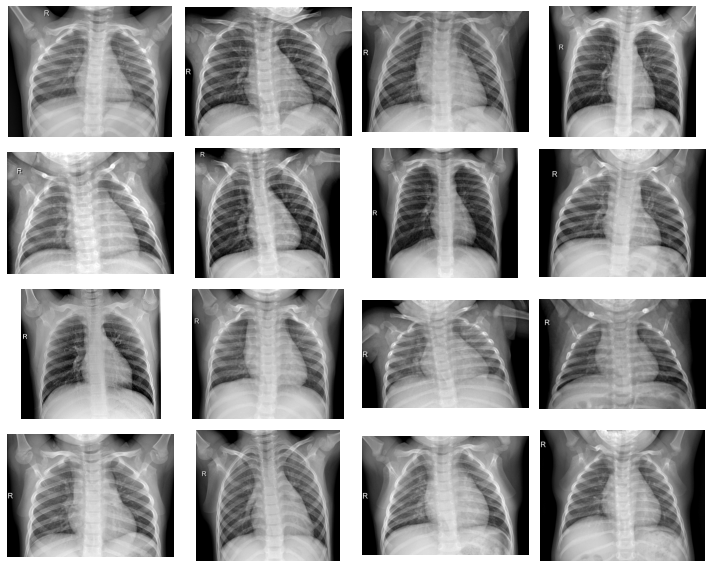

In [8]:
# Extract 16 random images from normal
random_images = [Normal[i] for i in range(16)]

print('Display Normal Images')

# Adjust the size of your images
plt.figure(figsize=(10,8))

# Iterate and plot random images
for i in range(16):
    plt.subplot(4, 4, i + 1)
    img = plt.imread(random_images[i])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
# Adjust subplot parameters to give specified padding
plt.tight_layout()  

Display Pneumonia Images


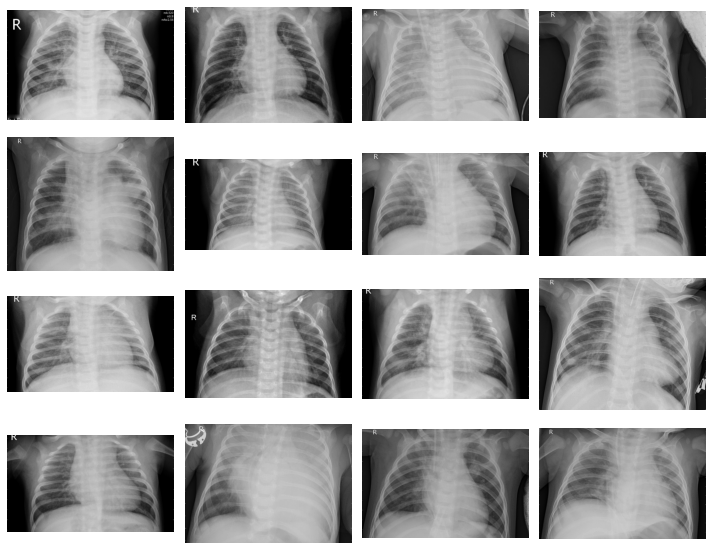

In [9]:
# Extract 16 random images from Pneumonia
random_images = [Pneumonia[i] for i in range(16)]

print('Display Pneumonia Images')

# Adjust the size of your images
plt.figure(figsize=(10,8))

# Iterate and plot random images
for i in range(16):
    plt.subplot(4, 4, i + 1)
    img = plt.imread(random_images[i])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
# Adjust subplot parameters to give specified padding
plt.tight_layout()  

# Find origin image shape

In [10]:
images_shape = []

for k, image_path in enumerate(glob(train_dir + "*/*")):
    image = Image.open(image_path)
    images_shape.append(image.size)

images_shape_df = pd.DataFrame(data = images_shape, columns = ['H', 'W'], dtype='object')
images_shape_df['Size'] = '[' + images_shape_df['H'].astype(str) + ',' + images_shape_df['W'].astype(str) + ']'


In [11]:
images_shape_df.head()

,H,W,Size
0,1152,728,"[1152,728]"
1,1856,1312,"[1856,1312]"
2,1434,986,"[1434,986]"
3,1224,712,"[1224,712]"
4,1176,856,"[1176,856]"


In [12]:
print("We have {} types of different shapes in training images".format(len(list(images_shape_df['Size'].unique()))))

We have 4366 types of different shapes in training images


# Traning Convolution Neural Network
I am trying EfficientNetB5 for 20 epochs with weights from Noisy Student. To make our model more easier to understand, I have imported EfficientNetB7 from keras.application and appending GlobalAveragePooling, Dropout and Dense layer.

In [13]:
# define architecture

baseModel = efn.EfficientNetB5(weights = "imagenet", include_top = False, input_shape = (224, 224, 3))
headModel = baseModel.output
headModel = GlobalAveragePooling2D()(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(1, activation='sigmoid', name = "efficientnet_dense")(headModel)

model = Model(inputs = baseModel.input, outputs = headModel, name = "EfficientNetB7")

model.trainable = True
model.summary()

115515392/115515256 [==============================] - 4s 0us/step
Model: "EfficientNetB7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 112, 112, 48) 1296        input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 112, 112, 48) 192         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 112, 112, 48) 0           stem_bn[0][0]                    
__________________

# Data Augmentation

In order to avoid overfitting problem, we need to perform augmentation on our dataset. We can make existing dataset even larger in this way. I am using ImageDataGenerator class to augment dataset. The methods used for Augmentation are rotation, zoom, width_shift, height_shift, horizontal_flip and rescale. Rescale is necessary for image normalization.

In [14]:
# image preprocessing
train_datagen = ImageDataGenerator(rotation_range = 20,
                                   zoom_range = 0.1,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip = True,
                                   rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
batch_size = 16
training_set = train_datagen.flow_from_directory(train_dir, 
                                                 target_size = (224, 224), 
                                                 batch_size = batch_size, 
                                                 class_mode = "binary")
val_set = val_datagen.flow_from_directory(val_dir,
                                          target_size = (224, 224),
                                          batch_size = batch_size,
                                          class_mode = 'binary')
test_set = test_datagen.flow_from_directory(test_dir,
                                          target_size = (224, 224),
                                          batch_size = batch_size,
                                          class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# compile the model

In [16]:

opt = Adam(lr = 0.003)
model.compile(loss = "binary_crossentropy",
              optimizer = opt,
              metrics = ["accuracy"])


In [17]:
# this will help in reducing learning rate by factor of 0.1 when accuarcy will not improve
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2, verbose = 1,
                                            factor = 0.1, min_lr = 0.000001)

In [18]:
# define criteria for stopping. we will stop training if validation accuracy got reached 99%
class myCallback(Callback):
	def on_epoch_end(self, epoch, logs={}):
		if(logs.get('val_accuracy') > 0.99):
			print("\nReached 99% accuracy so cancelling training!")
			self.model.stop_training = True

callbacks = myCallback()

In [19]:
checkpoint_filepath = 'xray_model.h5'
model_checkpoint_callback = ModelCheckpoint(filepath = checkpoint_filepath,
                                            save_weights_only = True,
                                            monitor = 'val_acc',
                                            mode = 'max',
                                            save_best_only = True)

# Training the Model

In [20]:
H = model.fit_generator(training_set,
                        steps_per_epoch = training_set.samples//batch_size,
                        validation_data = val_set,
                        epochs = 30,
                        validation_steps = val_set.samples,
                        callbacks = [reduce_lr, callbacks, model_checkpoint_callback])

Epoch 1/30
326/326 [==============================] - 2765s 8s/step - loss: 0.2591 - accuracy: 0.8969 - val_loss: 0.6870 - val_accuracy: 0.6875 - lr: 0.0030
Epoch 2/30
326/326 [==============================] - ETA: 0s - loss: 0.1595 - accuracy: 0.9385
Reached 99% accuracy so cancelling training!
326/326 [==============================] - 2761s 8s/step - loss: 0.1595 - accuracy: 0.9385 - val_loss: 0.1987 - val_accuracy: 1.0000 - lr: 0.0030


In [21]:
print("Loss of the model is - " , model.evaluate(test_set)[0])
print("Accuracy of the model is - " , model.evaluate(test_set)[1]*100 , "%")

39/39 [==============================] - 70s 2s/step - loss: 0.2629 - accuracy: 0.9071
Loss of the model is -  0.2628723382949829
39/39 [==============================] - 70s 2s/step - loss: 0.2629 - accuracy: 0.9071
Accuracy of the model is -  90.70512652397156 %


Display Random Images


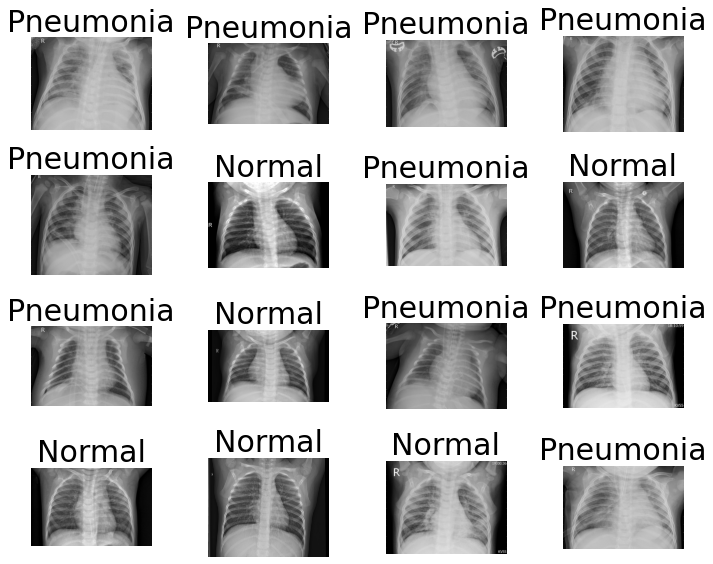

In [22]:
# Extract 16 random images from normal
imageset = glob(test_dir + "*/*")
random_images = [np.random.choice(imageset) for i in range(16)]

print('Display Random Images')

# Adjust the size of your images
plt.figure(figsize=(10,8))

# Iterate and plot random images
for i in range(16):
    plt.subplot(4, 4, i + 1)
    img = cv2.imread(random_images[i])
    orig = img.copy()
    img = cv2.resize(img, (224,224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img/255
    prediction = model.predict(img)
    
    if (prediction < 0.5):
        plt.title("Normal", fontdict = {'fontsize' : 30})
    
    else:
        plt.title("Pneumonia", fontdict = {'fontsize' : 30})
    plt.imshow(orig, cmap='gray')
    plt.axis('off')
    
# Adjust subplot parameters to give specified padding
plt.tight_layout()  

Display Random Images


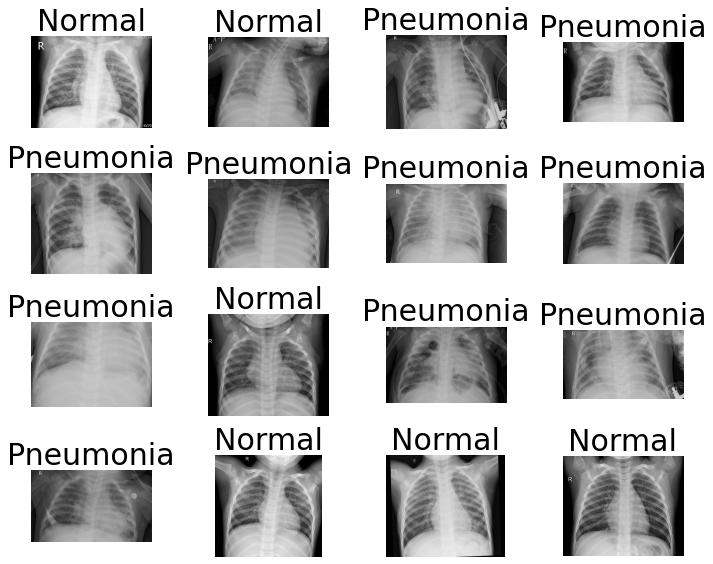

In [23]:
# Let's try this one more time
imageset = glob(train_dir + "*/*")
random_images = [np.random.choice(imageset) for i in range(16)]

print('Display Random Images')

# Adjust the size of your images
plt.figure(figsize=(10,8))

# Iterate and plot random images
for i in range(16):
    plt.subplot(4, 4, i + 1)
    img = cv2.imread(random_images[i])
    orig = img.copy()
    img = cv2.resize(img, (224,224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img/255
    prediction = model.predict(img)
    
    if (prediction < 0.5):
        plt.title("Normal", fontdict = {'fontsize' : 30})
    
    else:
        plt.title("Pneumonia", fontdict = {'fontsize' : 30})
    plt.imshow(orig, cmap='gray')
    plt.axis('off')
    
# Adjust subplot parameters to give specified padding
plt.tight_layout() 